In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline

In [2]:
hla = pd.read_table('../output/hla_complete.tsv')

bma_lit = pd.read_table('../manuscript/hla_supp_1.tsv', usecols=['allelotype','GBE_NAME','novel','nonadditive','URL'])
hla = hla.merge(bma_lit, how='outer')
hla = hla[(hla['BMA_posterior_prob'] >= 80) & (hla['delta_AIC'] <= -5)]

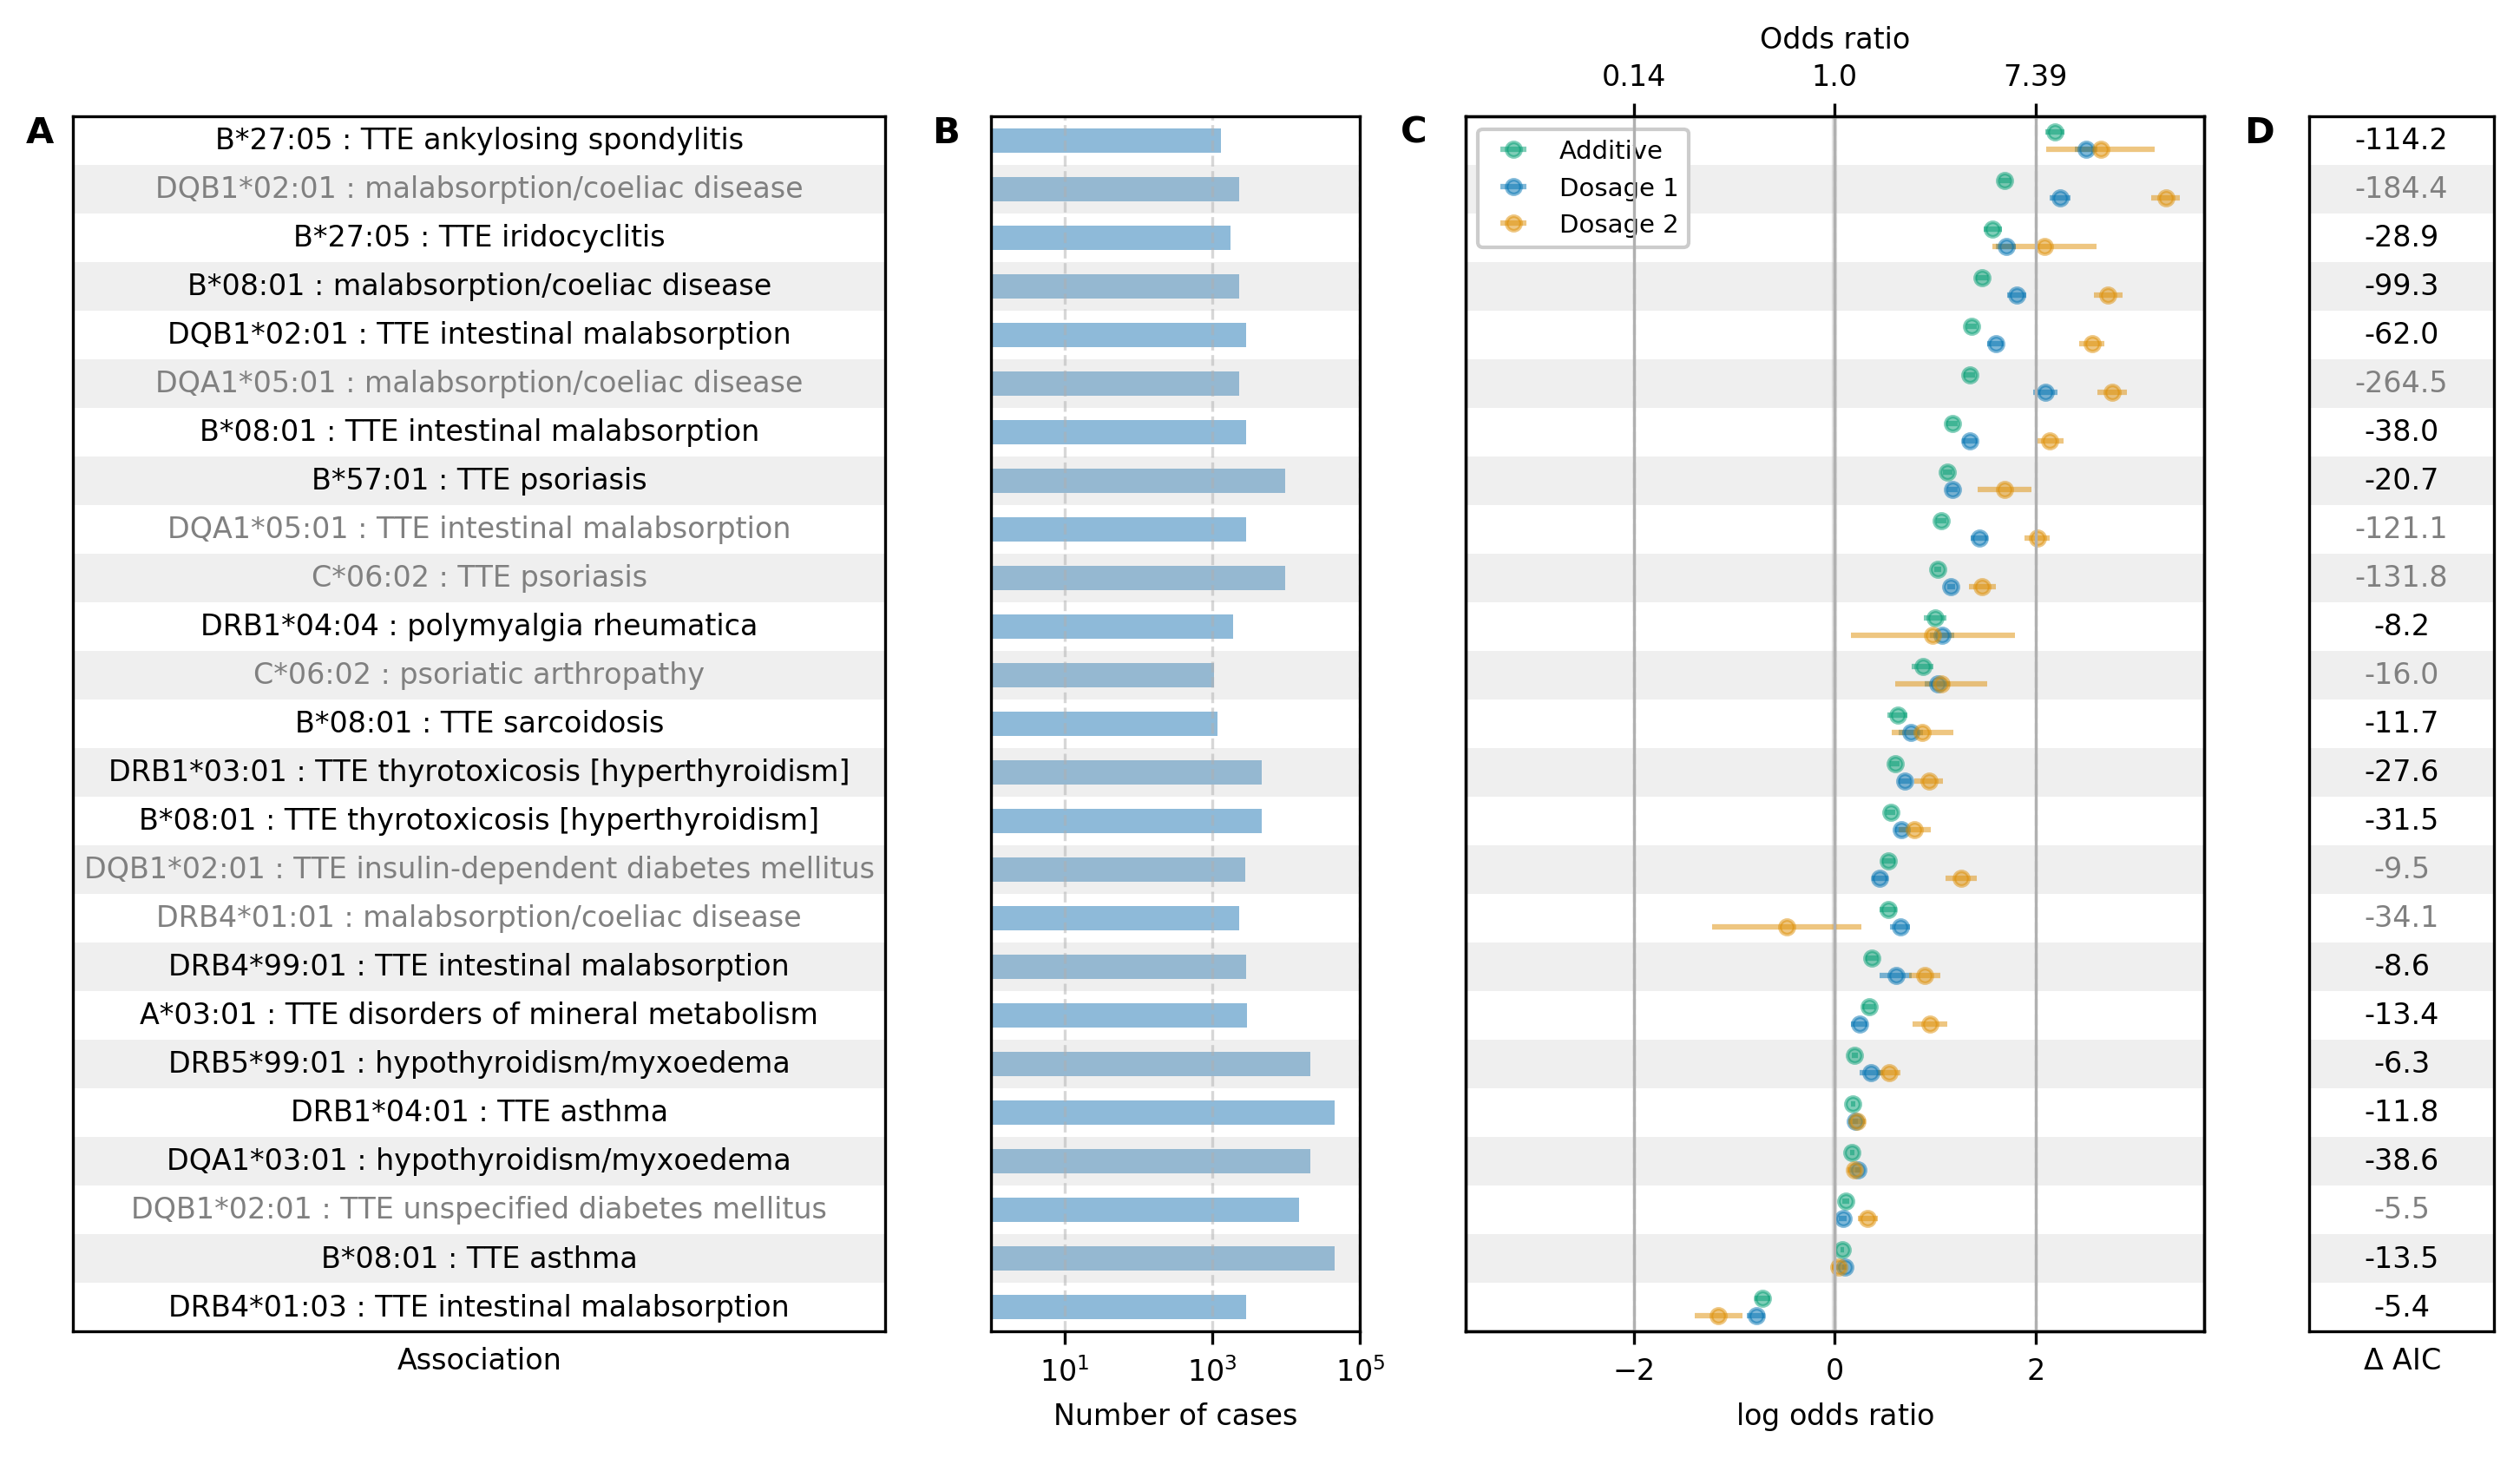

In [3]:
light_grey = (0.9, 0.9, 0.9)

colord = {0:2, 1:0, 2:1}
 
tdf = hla
tdf = tdf.sort_values(by='add_BETA')

global_ymin = -0.5
global_ymax = tdf.shape[0] - 0.5

fig = plt.figure(figsize=(12, 10), dpi=300)

# gs = gridspec.GridSpec(1, 1)
# ax = fig.add_subplot(gs[0, 0])
# ax.text(0, 1, 'Figure 3',
#         size=14, va='top')
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
# for sp in ax.spines.values():
#     sp.set_visible(False)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.grid()
# gs.tight_layout(fig, rect=[0, 0.88, 1, 1])

label_mapping = dict(zip(['add', 'gen_1', 'gen_2'],
                         ['Additive', 'Dosage 1', 'Dosage 2']))

gs = gridspec.GridSpec(2, 4, width_ratios=[2.2, 1, 2, 0.5], height_ratios=[17,8])

ax = fig.add_subplot(gs[0, 0])
ax.set_xticks([])
ax.set_yticks([])
for i, ind in enumerate(tdf.index):
    if tdf.loc[ind, 'nonadditive'] == 'Y':
        ax.text(0.5, i, ' : '.join([tdf.loc[ind, 'allelotype'], tdf.loc[ind, 'GBE_NAME'].replace('_',' ')]), size=8, va='center',
                ha='center', color='grey')
    else:
        ax.text(0.5, i, ' : '.join([tdf.loc[ind, 'allelotype'], tdf.loc[ind, 'GBE_NAME'].replace('_',' ')]), size=8, va='center',
                ha='center')
if tdf.shape[0] > 1:
    pal = sns.color_palette('colorblind')
    for i in range(1, tdf.shape[0] + 1):
        if i == 1:
            bottom = global_ymin
        else:
            bottom = (i - 1) - 0.5
        
        if i == tdf.shape[0]:
            top = global_ymax
        else:
            top = i - 0.5
        if i % 2 == 0:
            ax.axhspan(bottom, top, facecolor=(0.7, 0.7, 0.7), alpha=0.2, lw=0)
ax.set_xlabel('Association', fontsize=8)
ax.set_ylim(global_ymin, global_ymax)



ax = fig.add_subplot(gs[0, 1])
ax.barh(np.arange(tdf.shape[0]), np.log10(tdf.N_GBE), alpha=0.5, height=0.5)
ax.set_xticks([1, 3, 5])
ax.set_xticklabels(['$10^1$', '$10^3$', '$10^5$'])
ax.set_xlabel('Number of cases', fontsize=8)
ax.get_yaxis().set_ticks([])
# ax.set_yticklabels(tdf['GBE_NAME'])
# ytl = ['\n'.join(wrap(x, 25)) for x in tdf.name]
# ax.set_yticklabels(ytl, fontsize=7)
# loc = mpl.ticker.MultipleLocator(base=2)
# ax.yaxis.set_minor_locator(loc)

if tdf.shape[0] > 1:
    pal = sns.color_palette('colorblind')
    for i in range(1, tdf.shape[0] + 1):
        if i == 1:
            bottom = global_ymin
        else:
            bottom = (i - 1) - 0.5
        
        if i == tdf.shape[0]:
            top = global_ymax
        else:
            top = i - 0.5
        if i % 2 == 0:
            ax.axhspan(bottom, top, facecolor=(0.7, 0.7, 0.7), alpha=0.2, lw=0)

ax.grid()
ax.grid(axis='x', alpha=0.5, ls='--')
for t in ax.get_xticklabels():
    t.set_fontsize(8)
for t in ax.get_yticklabels():
    t.set_fontsize(8)
ax.set_ylim(global_ymin, global_ymax)
ax.set_ylim(global_ymin, global_ymax)


# ax = fig.add_subplot(gs[0, 2])
# for i, col in enumerate(['add', 'gen_1', 'gen_2']):
#     if i == 0:
#         ax.errorbar(-np.log10(tdf['{}_BY_ADJ_P'.format(col)]), 
#                     -(i - 1) * 0.18 + np.arange(tdf.shape[0]),
#                     fmt='o', alpha=0.5, c=sns.color_palette('colorblind')[colord[i]], 
#                     label=label_mapping[col], ms=4)
#     else:
#         ax.errorbar(-np.log10(tdf['{}_BY_ADJ_P'.format(col)]), 
#                     -0.18 + np.arange(tdf.shape[0]),
#                     fmt='o', alpha=0.5, c=sns.color_palette('colorblind')[colord[i]], 
#                     label=label_mapping[col], ms=4)
#     # ax.errorbar(-np.log10(tdf['{}_P'.format(col)]), 
#     #             -(i - 1) * 0.18 + np.arange(tdf.shape[0]),
#     #             fmt='o', alpha=0.5, c=sns.color_palette('colorblind')[colord[i]], 
#     #             label=label_mapping[col], ms=4)

# ax.set_xticks([0, 10, 100, 1000])
# ax.set_xlabel('$-\log_{10}$ $p$-value', fontsize=8)
# ax.set_yticks([])
# # ax.set_yticks(np.arange(tdf.shape[0]))
# # ytl = ['\n'.join(wrap(x, 25)) for x in tdf.trait.drop_duplicates()]
# # ax.set_yticklabels(ytl)

# if tdf.shape[0] > 1:
#     pal = sns.color_palette('colorblind')
#     for i in range(1, tdf.shape[0] + 1):
#         if i == 1:
#             bottom = global_ymin
#         else:
#             bottom = (i - 1) - 0.5
        
#         if i == tdf.shape[0]:
#             top = global_ymax
#         else:
#             top = i - 0.5
#         if i % 2 == 0:
#             ax.axhspan(bottom, top, facecolor=(0.7, 0.7, 0.7), alpha=0.2, lw=0)
# ax.vlines(0, global_ymin, global_ymax, color=light_grey, linestyles='-',
#           zorder=1)
# ax.grid()
# ax.grid(axis='x', alpha=0.5, ls='--')
# ax.set_ylim(global_ymin, global_ymax)
# for t in ax.get_xticklabels() + ax.get_yticklabels():
#     t.set_fontsize(8)
# # ax.spines['left'].set_visible(False)
# # ax.spines['right'].set_visible(False)

ax = fig.add_subplot(gs[0, 2])
for i,col in enumerate(['add', 'gen_1', 'gen_2']):
    lors = tdf['{}_BETA'.format(col)]
    err = 1.96 * tdf['{}_SE'.format(col)]
    if i == 0:
        ax.errorbar(lors, -(i - 1) * 0.18 + np.arange(lors.shape[0]), fmt='o', alpha=0.5,
                    c=sns.color_palette('colorblind')[colord[i]], label=label_mapping[col],
                    xerr=err, ms=4)
    else:
        ax.errorbar(lors, -0.18 + np.arange(lors.shape[0]), fmt='o', alpha=0.5,
                    c=sns.color_palette('colorblind')[colord[i]], label=label_mapping[col],
                    xerr=err, ms=4)
    # ax.errorbar(lors, -(i - 1) * 0.18 + np.arange(lors.shape[0]), fmt='o', alpha=0.5,
    #             c=sns.color_palette('colorblind')[colord[i]], label=label_mapping[col],
    #             xerr=err, ms=4)

lgd = ax.legend(framealpha=1, frameon=True,
                facecolor='white', fontsize=7)#, loc='lower right')
 
#ymin,ymax = ax.get_ylim()
# global_ymin = -0.5
# global_ymax = tdf.shape[0] - 0.5
if tdf.shape[0] > 1:
    pal = sns.color_palette('colorblind')
    for i in range(1, tdf.shape[0] + 1):
        if i == 1:
            bottom = global_ymin
        else:
            bottom = (i - 1) - 0.5
        
        if i == tdf.shape[0]:
            top = global_ymax
        else:
            top = i - 0.5
        if i % 2 == 0:
            ax.axhspan(bottom, top, facecolor=(0.7, 0.7, 0.7), alpha=0.2, lw=0)

# ax.vlines(0, global_ymin, global_ymax, color='grey', linestyle='--', alpha=0.75)
ax.vlines(0, global_ymin, global_ymax, color=light_grey, linestyles='-',
          zorder=1)
xmin,xmax = ax.get_xlim()
ax.set_xlim(-max(abs(xmin), abs(xmax)), max(abs(xmin), abs(xmax)))
ax.set_ylim(global_ymin, global_ymax)
ax.set_yticks([])
ax.set_xlabel('$\log$ odds ratio', fontsize=8)
ax.grid()
ax.grid(axis='x', alpha=0.5, ls='--')
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks()[1:-1])
ax2.set_xticklabels(np.exp(ax.get_xticks()).round(2)[1:-1])
ax2.set_xlabel('Odds ratio', fontsize=8)
ax2.grid()
for t in ax2.get_xticklabels() + ax2.get_yticklabels():
    t.set_fontsize(8)
# ax2.spines['left'].set_visible(False)
# ax2.spines['right'].set_visible(False)

if tdf.shape[0] <= 3:
    height = 0.25
else:
    height = 0.75
    
ax = fig.add_subplot(gs[0, 3])
ax.set_xticks([])
ax.set_yticks([])
for i, ind in enumerate(tdf.index):
    if tdf.loc[ind, 'nonadditive'] == 'Y':
        ax.text(0.5, i, tdf.loc[ind, 'delta_AIC'].round(1), size=8, va='center',
                ha='center', color='grey')
    else:
        ax.text(0.5, i, tdf.loc[ind, 'delta_AIC'].round(1), size=8, va='center',
                ha='center')
if tdf.shape[0] > 1:
    pal = sns.color_palette('colorblind')
    for i in range(1, tdf.shape[0] + 1):
        if i == 1:
            bottom = global_ymin
        else:
            bottom = (i - 1) - 0.5
        
        if i == tdf.shape[0]:
            top = global_ymax
        else:
            top = i - 0.5
        if i % 2 == 0:
            ax.axhspan(bottom, top, facecolor=(0.7, 0.7, 0.7), alpha=0.2, lw=0)
ax.set_xlabel('$\Delta$ AIC', fontsize=8)
ax.set_ylim(global_ymin, global_ymax)

t = fig.text(0.11, 0.87, 'A', weight='bold', size=10)
t = fig.text(0.4, 0.87, 'B', weight='bold', size=10)
t = fig.text(0.55, 0.87, 'C', weight='bold', size=10)
t = fig.text(0.82, 0.87, 'D', weight='bold', size=10)

plt.savefig('../figures/fig3.jpg', dpi=600)